In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


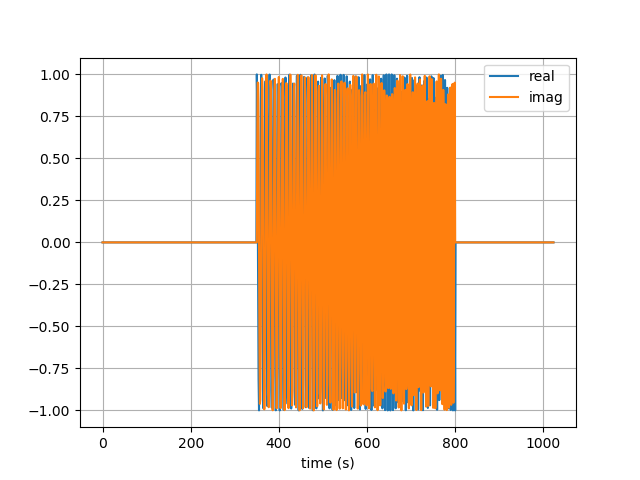

In [4]:
###### import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

Ts = 1.0 # nyquist rate would support up to 0.5 Hz
N = 1024 # max time of simulation is 1023 sec

# generate a complex chirp
tStart = 350
tEnd = 800
TChirp = tEnd - tStart + 1

def IQChirp(t, f0, t1, f1, method='linear', phi=0, vertex_zero=True):
    chirpI = sig.chirp(t, f0, t1, f1,
                       method=method,
                       phi=phi,
                       vertex_zero=vertex_zero)
    chirpQ = sig.chirp(t, f0, t1, f1,
                       method=method,
                       phi=phi-90.0,
                       vertex_zero=vertex_zero)
    return (chirpI + 1j*chirpQ)

timesChirp = np.arange(0, TChirp, Ts)
fStart = 0.1
fEnd = 0.2
chirp = IQChirp(timesChirp, fStart, timesChirp[-1], fEnd)
t = np.multiply(Ts, np.arange(0, N))
x = np.zeros(N, dtype=complex)
x[tStart:(tEnd+1)] = chirp

plt.figure()
plt.plot(t, np.real(x), 'C0', label="real")
plt.plot(t, np.imag(x), 'C1', label="imag")
plt.xlabel("time (s)")
plt.grid()
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


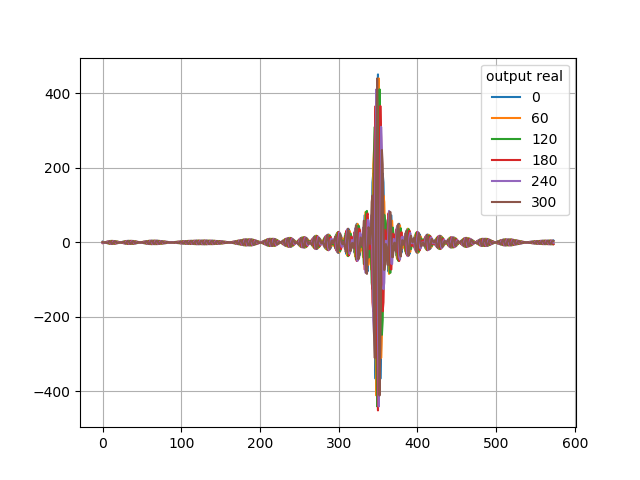

<IPython.core.display.Javascript object>


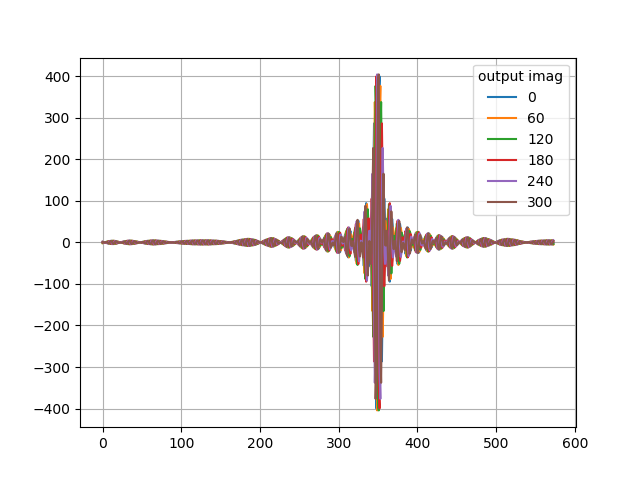

<IPython.core.display.Javascript object>


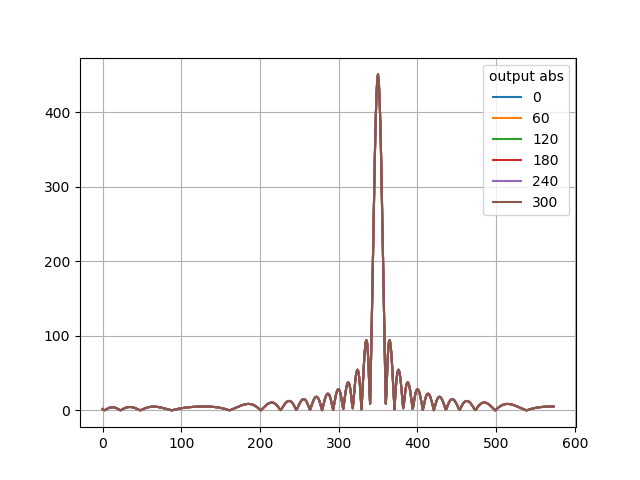

In [6]:
# matched filter
timesChirpMF = np.arange(0, TChirp, Ts)
fStartMF = 0.1
fEndMF = 0.2

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig, ax = plt.subplots()

for i, phi in enumerate(np.arange(0, 360, 60)):
    chirpMF = np.flipud(np.conj(IQChirp(timesChirp, fStart, timesChirp[-1], fEnd, phi=phi)))
    out = np.convolve(x, chirpMF, mode='valid')
    ax1.plot(np.real(out), 'C{:d}-'.format(i), label="{}".format(phi))
    ax2.plot(np.imag(out), 'C{:d}-'.format(i), label="{}".format(phi))
    ax.plot(np.abs(out), 'C{:d}-'.format(i), label="{}".format(phi))

ax1.grid()
ax1.legend(title="output real")
ax2.grid()
ax2.legend(title="output imag")
ax.grid()
ax.legend(title="output abs")

plt.show()

<IPython.core.display.Javascript object>


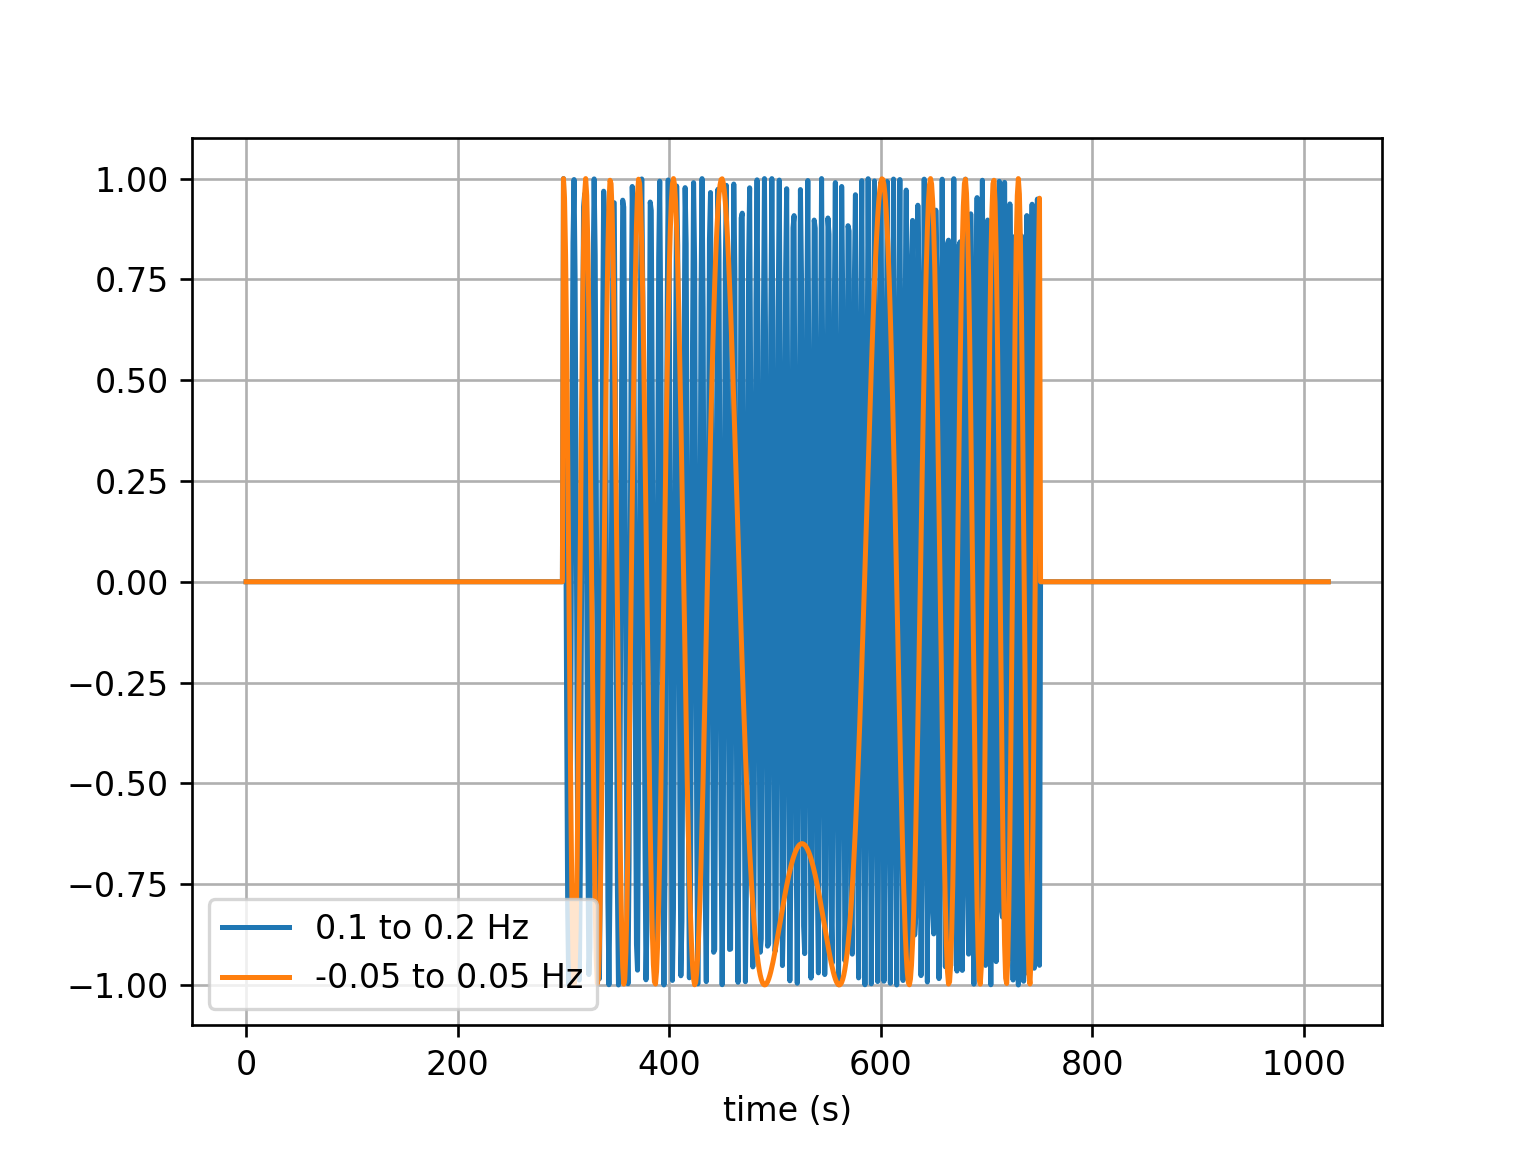

<IPython.core.display.Javascript object>


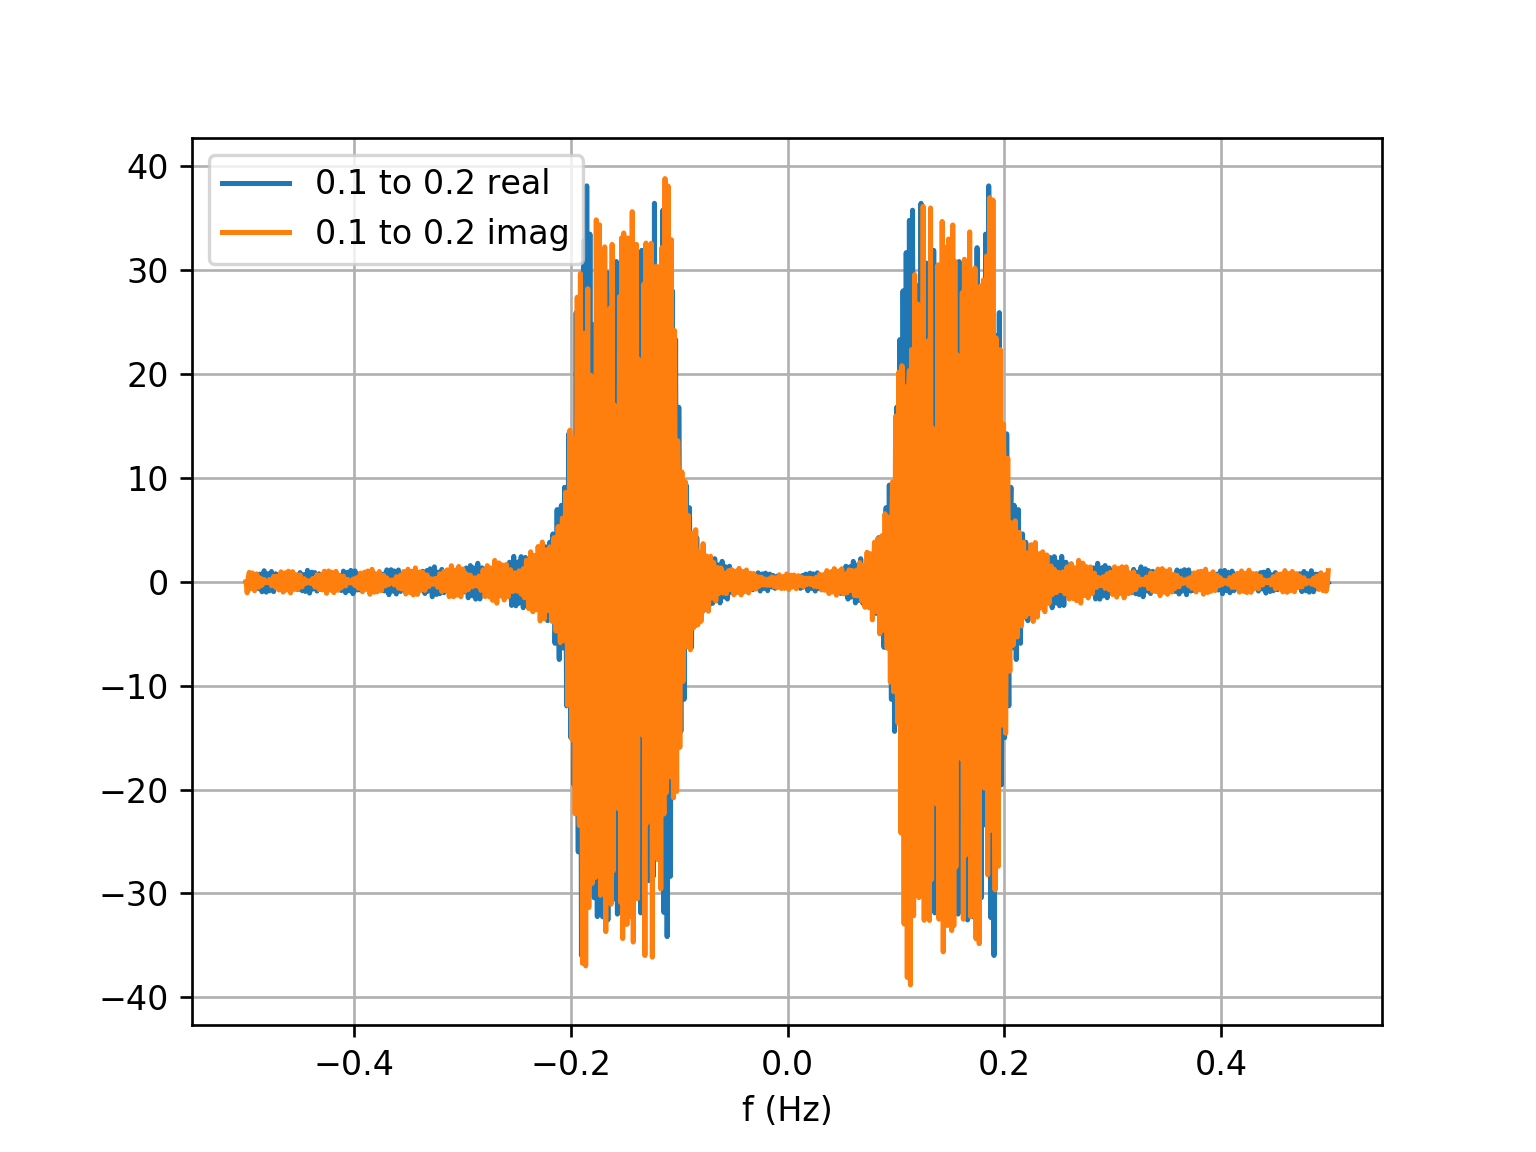

<IPython.core.display.Javascript object>


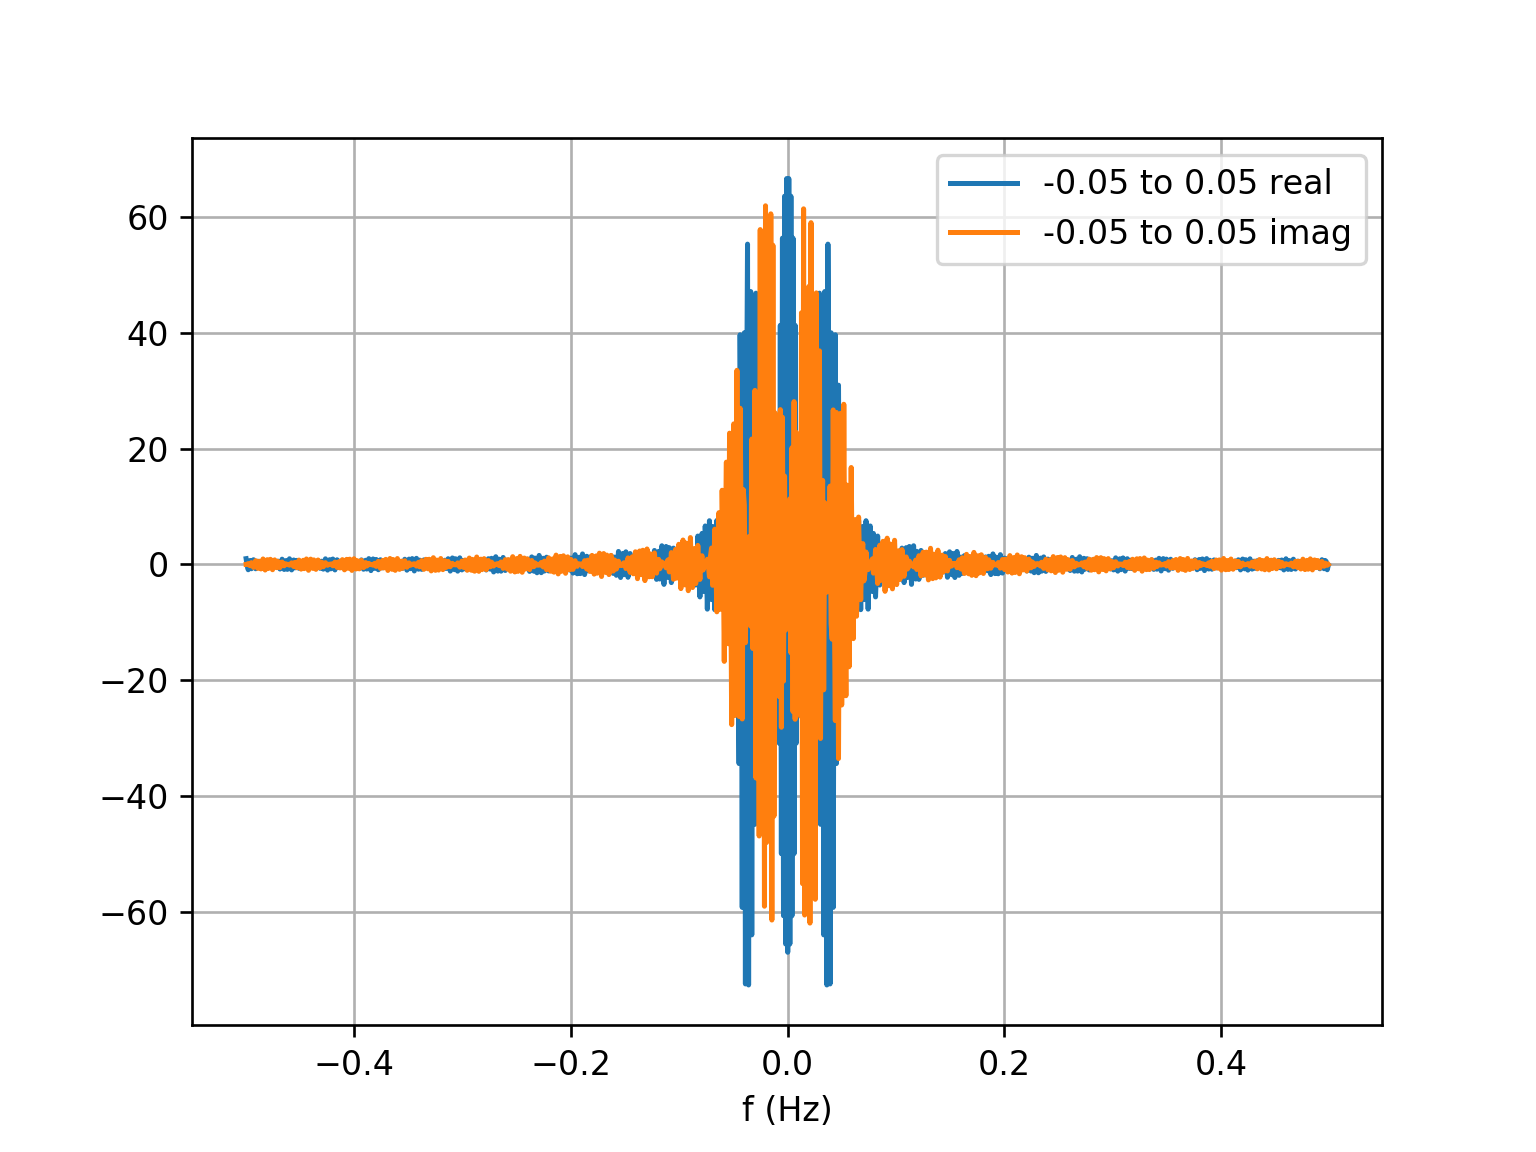

In [55]:
# construct a chirp from t = 300 to 750 sec going from
# 0.1 Hz to 0.2 Hz

# construct a second chirp in the same time going from -0.05 to 0.05 Hz

tStart = 300
tEnd = 750
TChirp = tEnd - tStart + 1
chirp = sig.chirp(np.arange(0, TChirp, Ts), 0.1, TChirp, 0.2)
chirp2 = sig.chirp(np.arange(0, TChirp, Ts), -0.05, TChirp, 0.05)

# first waveform
x = np.zeros(N)
x[tStart:(tEnd+1)] = chirp
#second waveform
x2 = np.zeros(N)
x2[tStart:(tEnd+1)] = chirp2

plt.figure()
plt.plot(t, x, 'C0', label="0.1 to 0.2 Hz")
plt.plot(t, x2, 'C1', label="-0.05 to 0.05 Hz")
plt.xlabel("time (s)")
plt.grid()
plt.legend()

# what does the FFT look like
f = np.fft.fftshift(np.fft.fftfreq(N, Ts))
F = np.fft.fftshift(np.fft.fft(x))
F2 = np.fft.fftshift(np.fft.fft(x2))

plt.figure()
plt.plot(f, np.real(F), 'C0', label="0.1 to 0.2 real")
plt.plot(f, np.imag(F), 'C1', label="0.1 to 0.2 imag")
plt.xlabel("f (Hz)")
plt.grid()
plt.legend()

plt.figure()
plt.plot(f, np.real(F2), 'C0', label="-0.05 to 0.05 real")
plt.plot(f, np.imag(F2), 'C1', label="-0.05 to 0.05 imag")
plt.xlabel("f (Hz)")
plt.grid()
plt.legend()

plt.show()

<IPython.core.display.Javascript object>


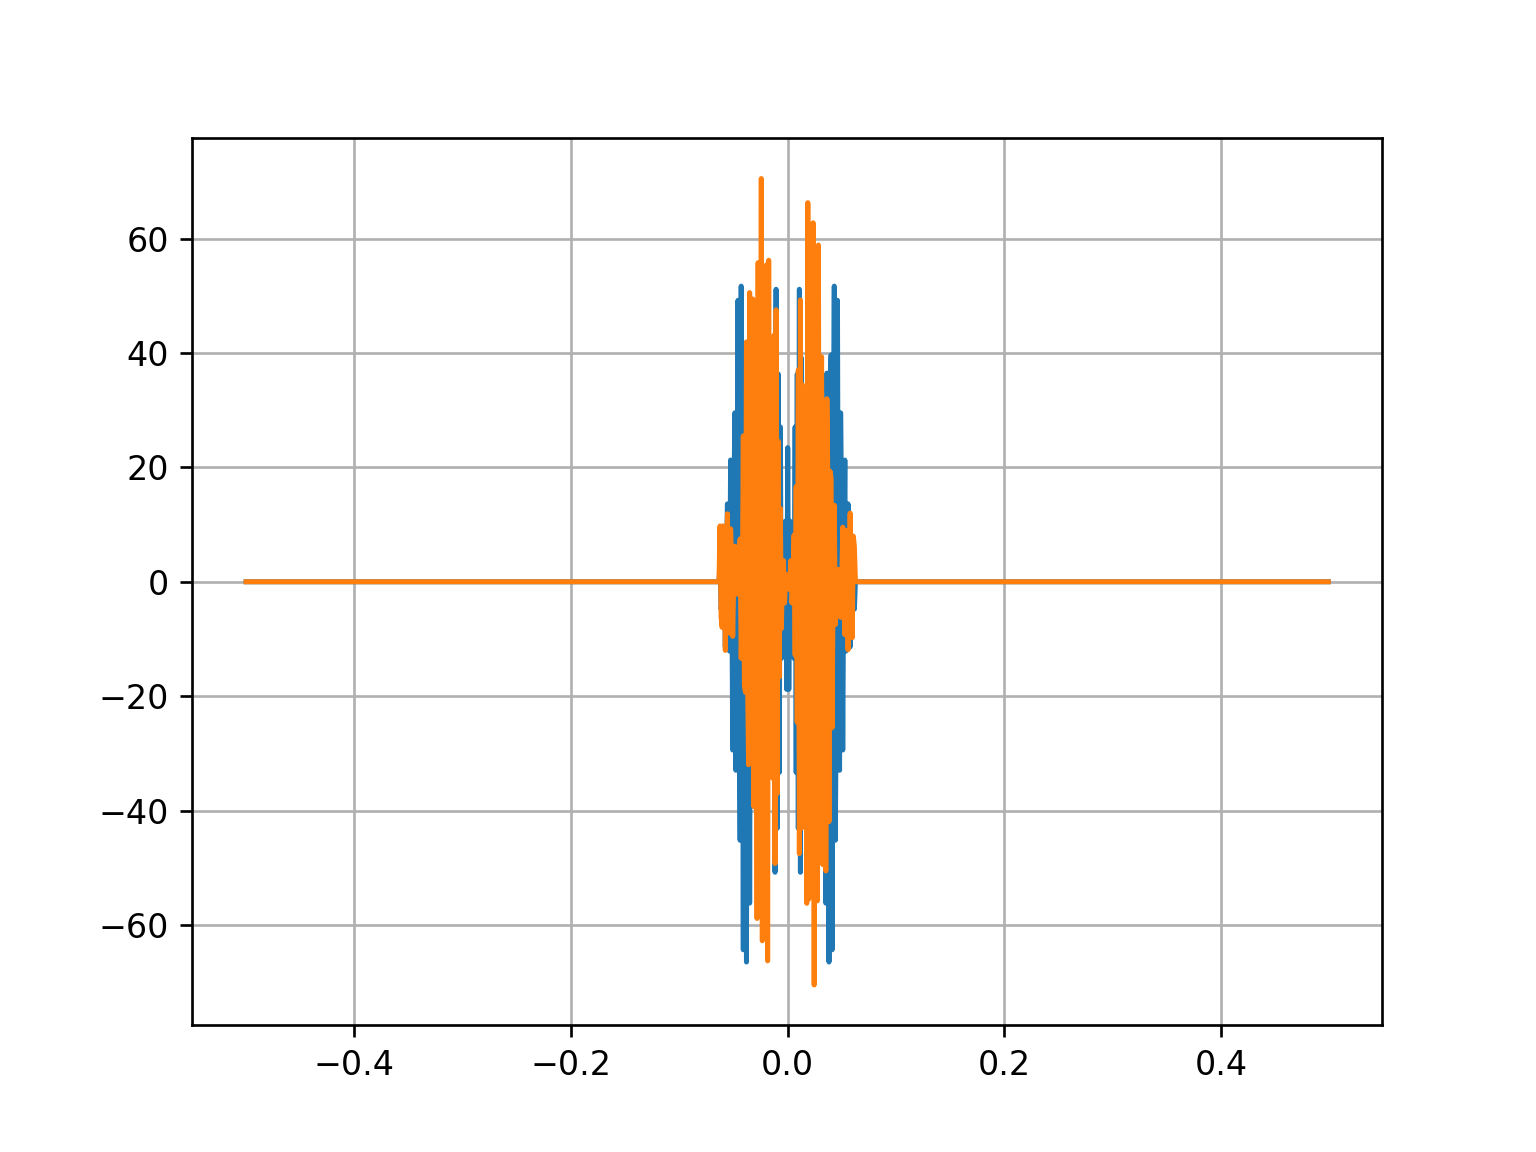

<IPython.core.display.Javascript object>


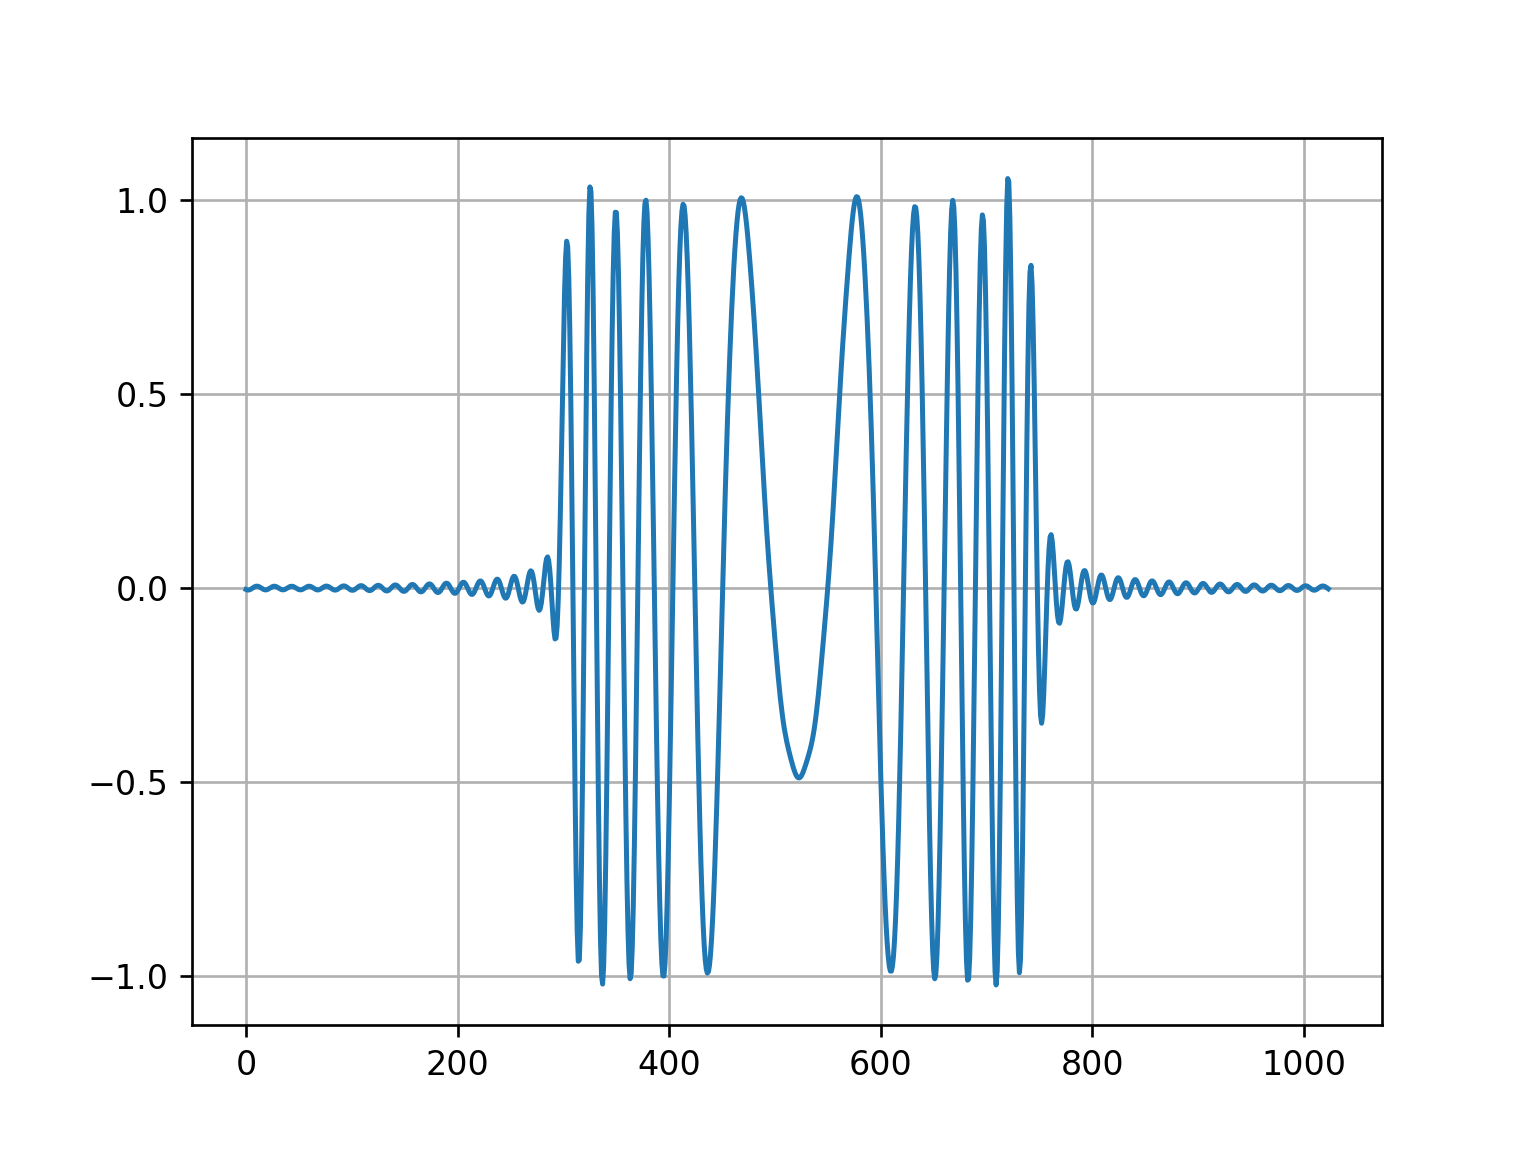

In [69]:
# 0.15 is center of positive chirp: (0.5+0.15)*1024 = 665.6 -> ~665 (floor on +ve)
# -0.15 is center of negative chirp: (0.5-0.15)*1024 = 358.4 -> ~359 (ceil on -ve)

# keep only the useful parts of the FFT spectrum and discard everything else
Fmixed = np.zeros(N, dtype=complex)
Fmixed[512-64:512+64] = F[665-64:665+64] + F[359-64:359+64]

plt.figure()
plt.plot(f, np.real(Fmixed), 'C0-')
plt.plot(f, np.imag(Fmixed), 'C1-')
plt.grid()

FMixedCO = np.fft.fftshift(Fmixed)
xMixed = np.fft.ifft(FMixedCO)

plt.figure()
plt.plot(t, xMixed)
plt.grid()

plt.show()


# print(f[665], f[359])
# print(f[665-64], f[665+64])
# print(f[359-64], f[359+64])
# print((665+64) - (665-64))

(451,)


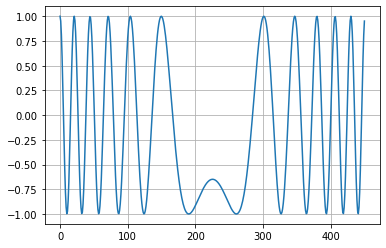

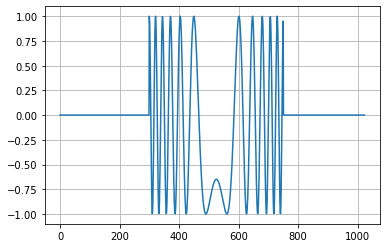

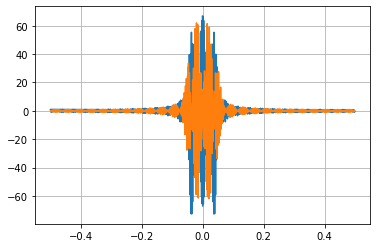

In [12]:
# tStart = 300
# tEnd = 750
# TChirp = tEnd - tStart + 1
chirp2 = sig.chirp(np.arange(0, TChirp, Ts), -0.05, TChirp, 0.05)
print(chirp2.shape)
x2 = np.zeros(N)
x2[tStart:(tEnd+1)] = chirp2

plt.figure()
plt.plot(chirp2)
plt.grid()

plt.figure()
plt.plot(x2)
plt.grid()

# what does the FFT look like
F2 = np.fft.fft(x2)
# f = np.fft.fftfreq(N, Ts)

plt.figure()
plt.plot(f, np.real(F2), 'C0', label="real")
plt.plot(f, np.imag(F2), 'C1', label="imag")
plt.grid()

plt.show()

fTest[0:2]:  [0.       0.015625]
fEdge:  0.0078125


<IPython.core.display.Javascript object>


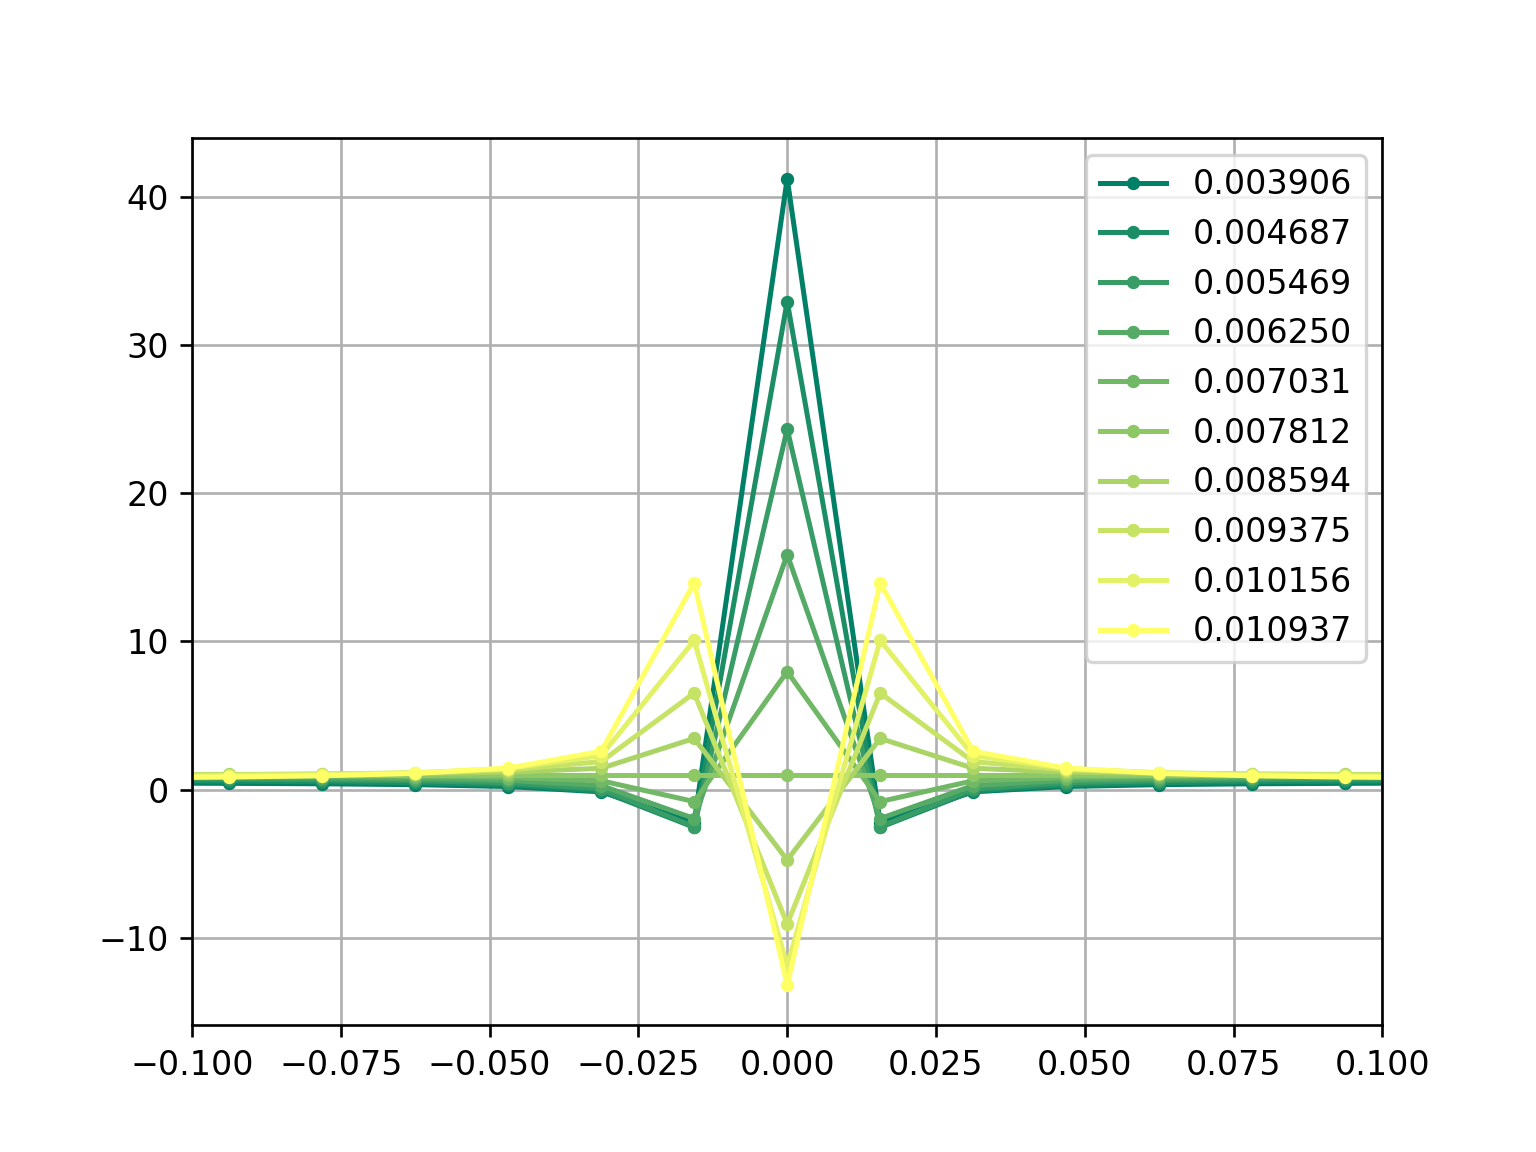

<IPython.core.display.Javascript object>


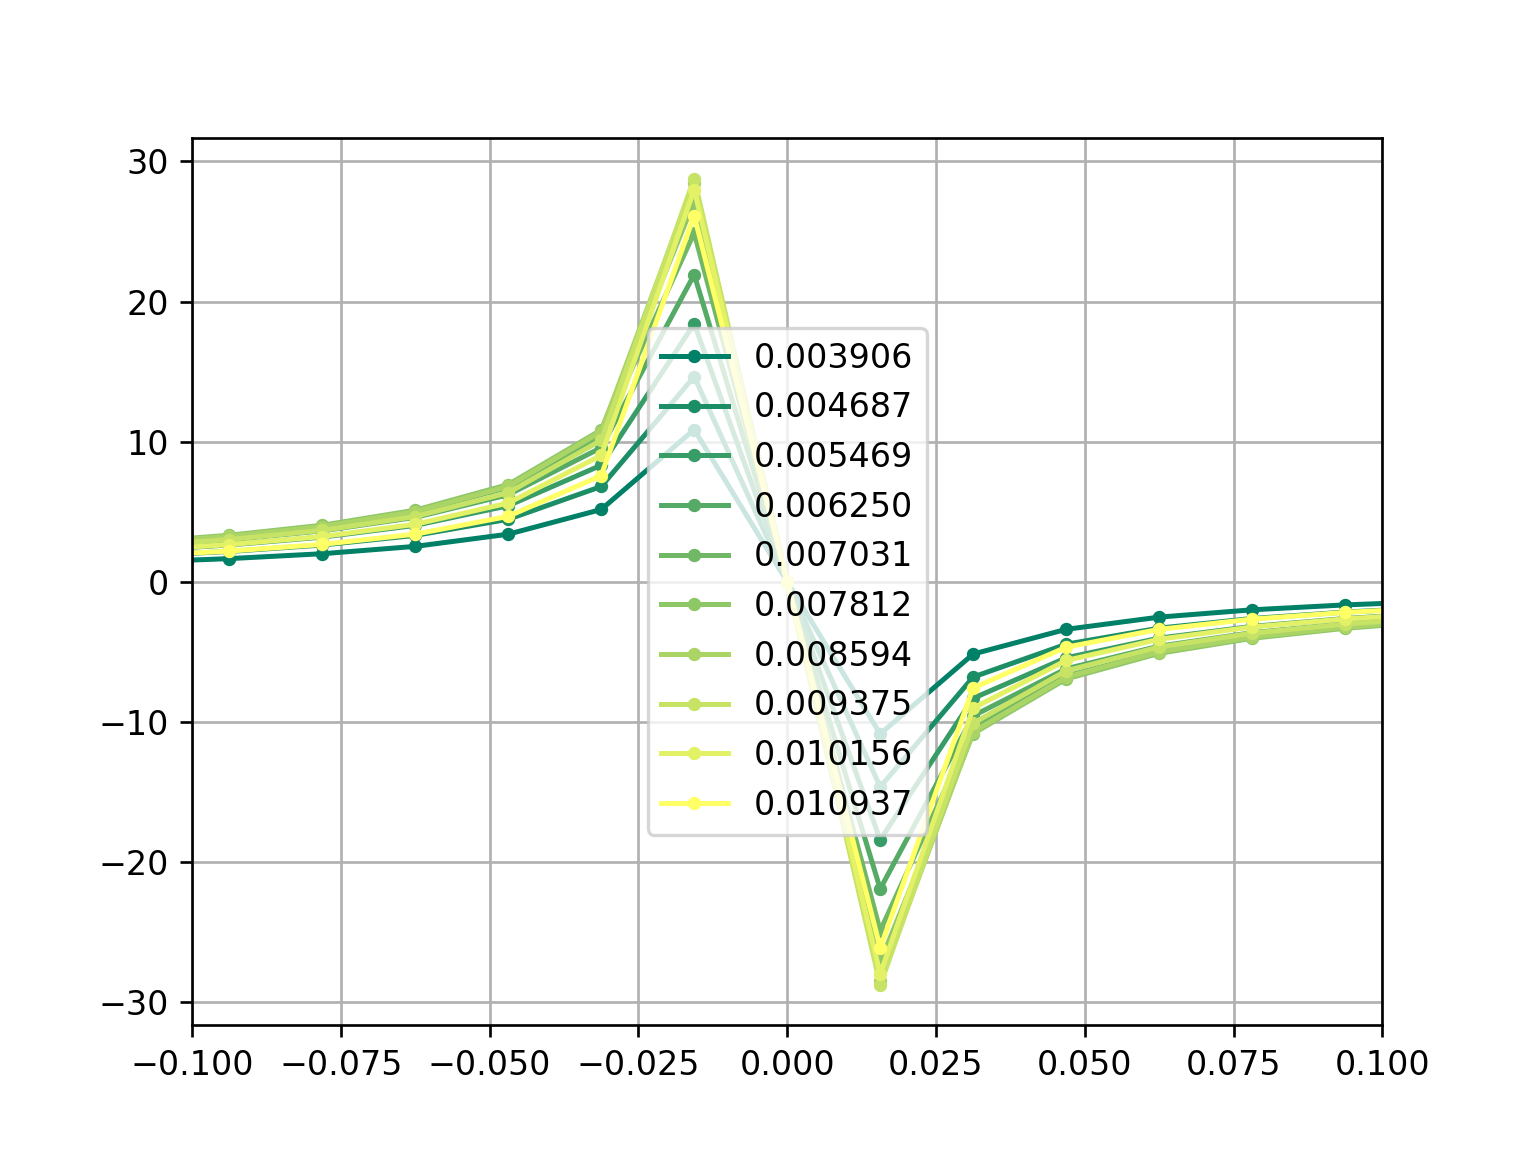

In [50]:
# verify that the frequencies represent the center of a bin

fTest = np.fft.fftfreq(64, 1.0)
print("fTest[0:2]: ", fTest[0:2])
fEdge = fTest[1]/2
print("fEdge: ", fEdge)

t = np.arange(0, 64, 1.0)
f = np.fft.fftshift(np.fft.fftfreq(64, 1.0))
freqs = np.arange(fEdge*0.5, fEdge*1.5, fEdge*0.1)
colors = plt.cm.summer(np.linspace(0, 1, freqs.shape[0]))
_, ax1 = plt.subplots()
_, ax2 = plt.subplots()

for i, f0 in enumerate(freqs):
    x = np.cos(2*np.pi*f0*t)
    F = np.fft.fft(x)
    ax1.plot(f, np.fft.fftshift(np.real(F)), color=colors[i], marker = '.', label="{:f}".format(f0))
    ax2.plot(f, np.fft.fftshift(np.imag(F)), color=colors[i], marker = '.', label="{:f}".format(f0))    

ax1.grid()
ax1.set_xlim(-0.1, 0.1)
ax1.legend()
ax2.grid()
ax2.set_xlim(-0.1, 0.1)
ax2.legend()

plt.show()